In [22]:
import numpy as np 
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt
 
import warnings
warnings.filterwarnings("ignore") 
# sns.set_style("darkgrid", {"grid.color": ".6", 
#                            "grid.linestyle": ":"})
 
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

# from xgboost import XGBClassifier
# from sklearn.metrics import r2_score
# from sklearn.metrics import mean_squared_error 
# from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('/Users/thutranghoa/Code/Data_analysis/Data/Breast Cancer Wisconsin (Diagnostic) Data Set.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [12]:
df = df.drop(['Unnamed: 32'], axis=1)


In [18]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [15]:
df.shape

(569, 32)

In [19]:
df.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [43]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

## What are they ? 
This dataset includes features about diagnosis of breast cancer. For details :

- ID : Patient identifier\
- Diagnosis : indicates whether the tumor is Benign (B) or malignant (M) --> Output\

** Data about physical dimensions of tumor (each is calculated 3 values : Mean, Worst and SE)
- Radius : the size of the tumor\
- Texture : a measures of the tumor's surface smoothness\
- Perimeter : linked to the size and growth rate of the tumor\
- Area : Larger tumor areas are seen in advanced stages of breast cancer\

** Data about tumor texture and composition (each is calculated 3 values : Mean, Worst and SE)
- Smoothness : variations in the tumor surface \
- Compactness : correlate with denser, potentially cancerous\
- Concavity : sign of malignancy\
- Concavity points : increased number of concave points -> malignant tumor\

** Others 
- Symmetry : asymmetrical tumors are more likely to be cancerous.\
- Fractal dimension : higher values indicate more complex, malignant\


## Why are they chosen ?

- Because these features provide a detailed profile of the tumor, for accurate diagnosis and treatment planning\

- Features like radius, perimeter and area are related to physiscal size of tumor, important for staging the cancer\

- Texture, smoothness and compactness offer insights into tumor;s cell structure, allow determining the type of cancer (B or M)\

In conclusion, having and understanding features are essential for effective breast cancer management.

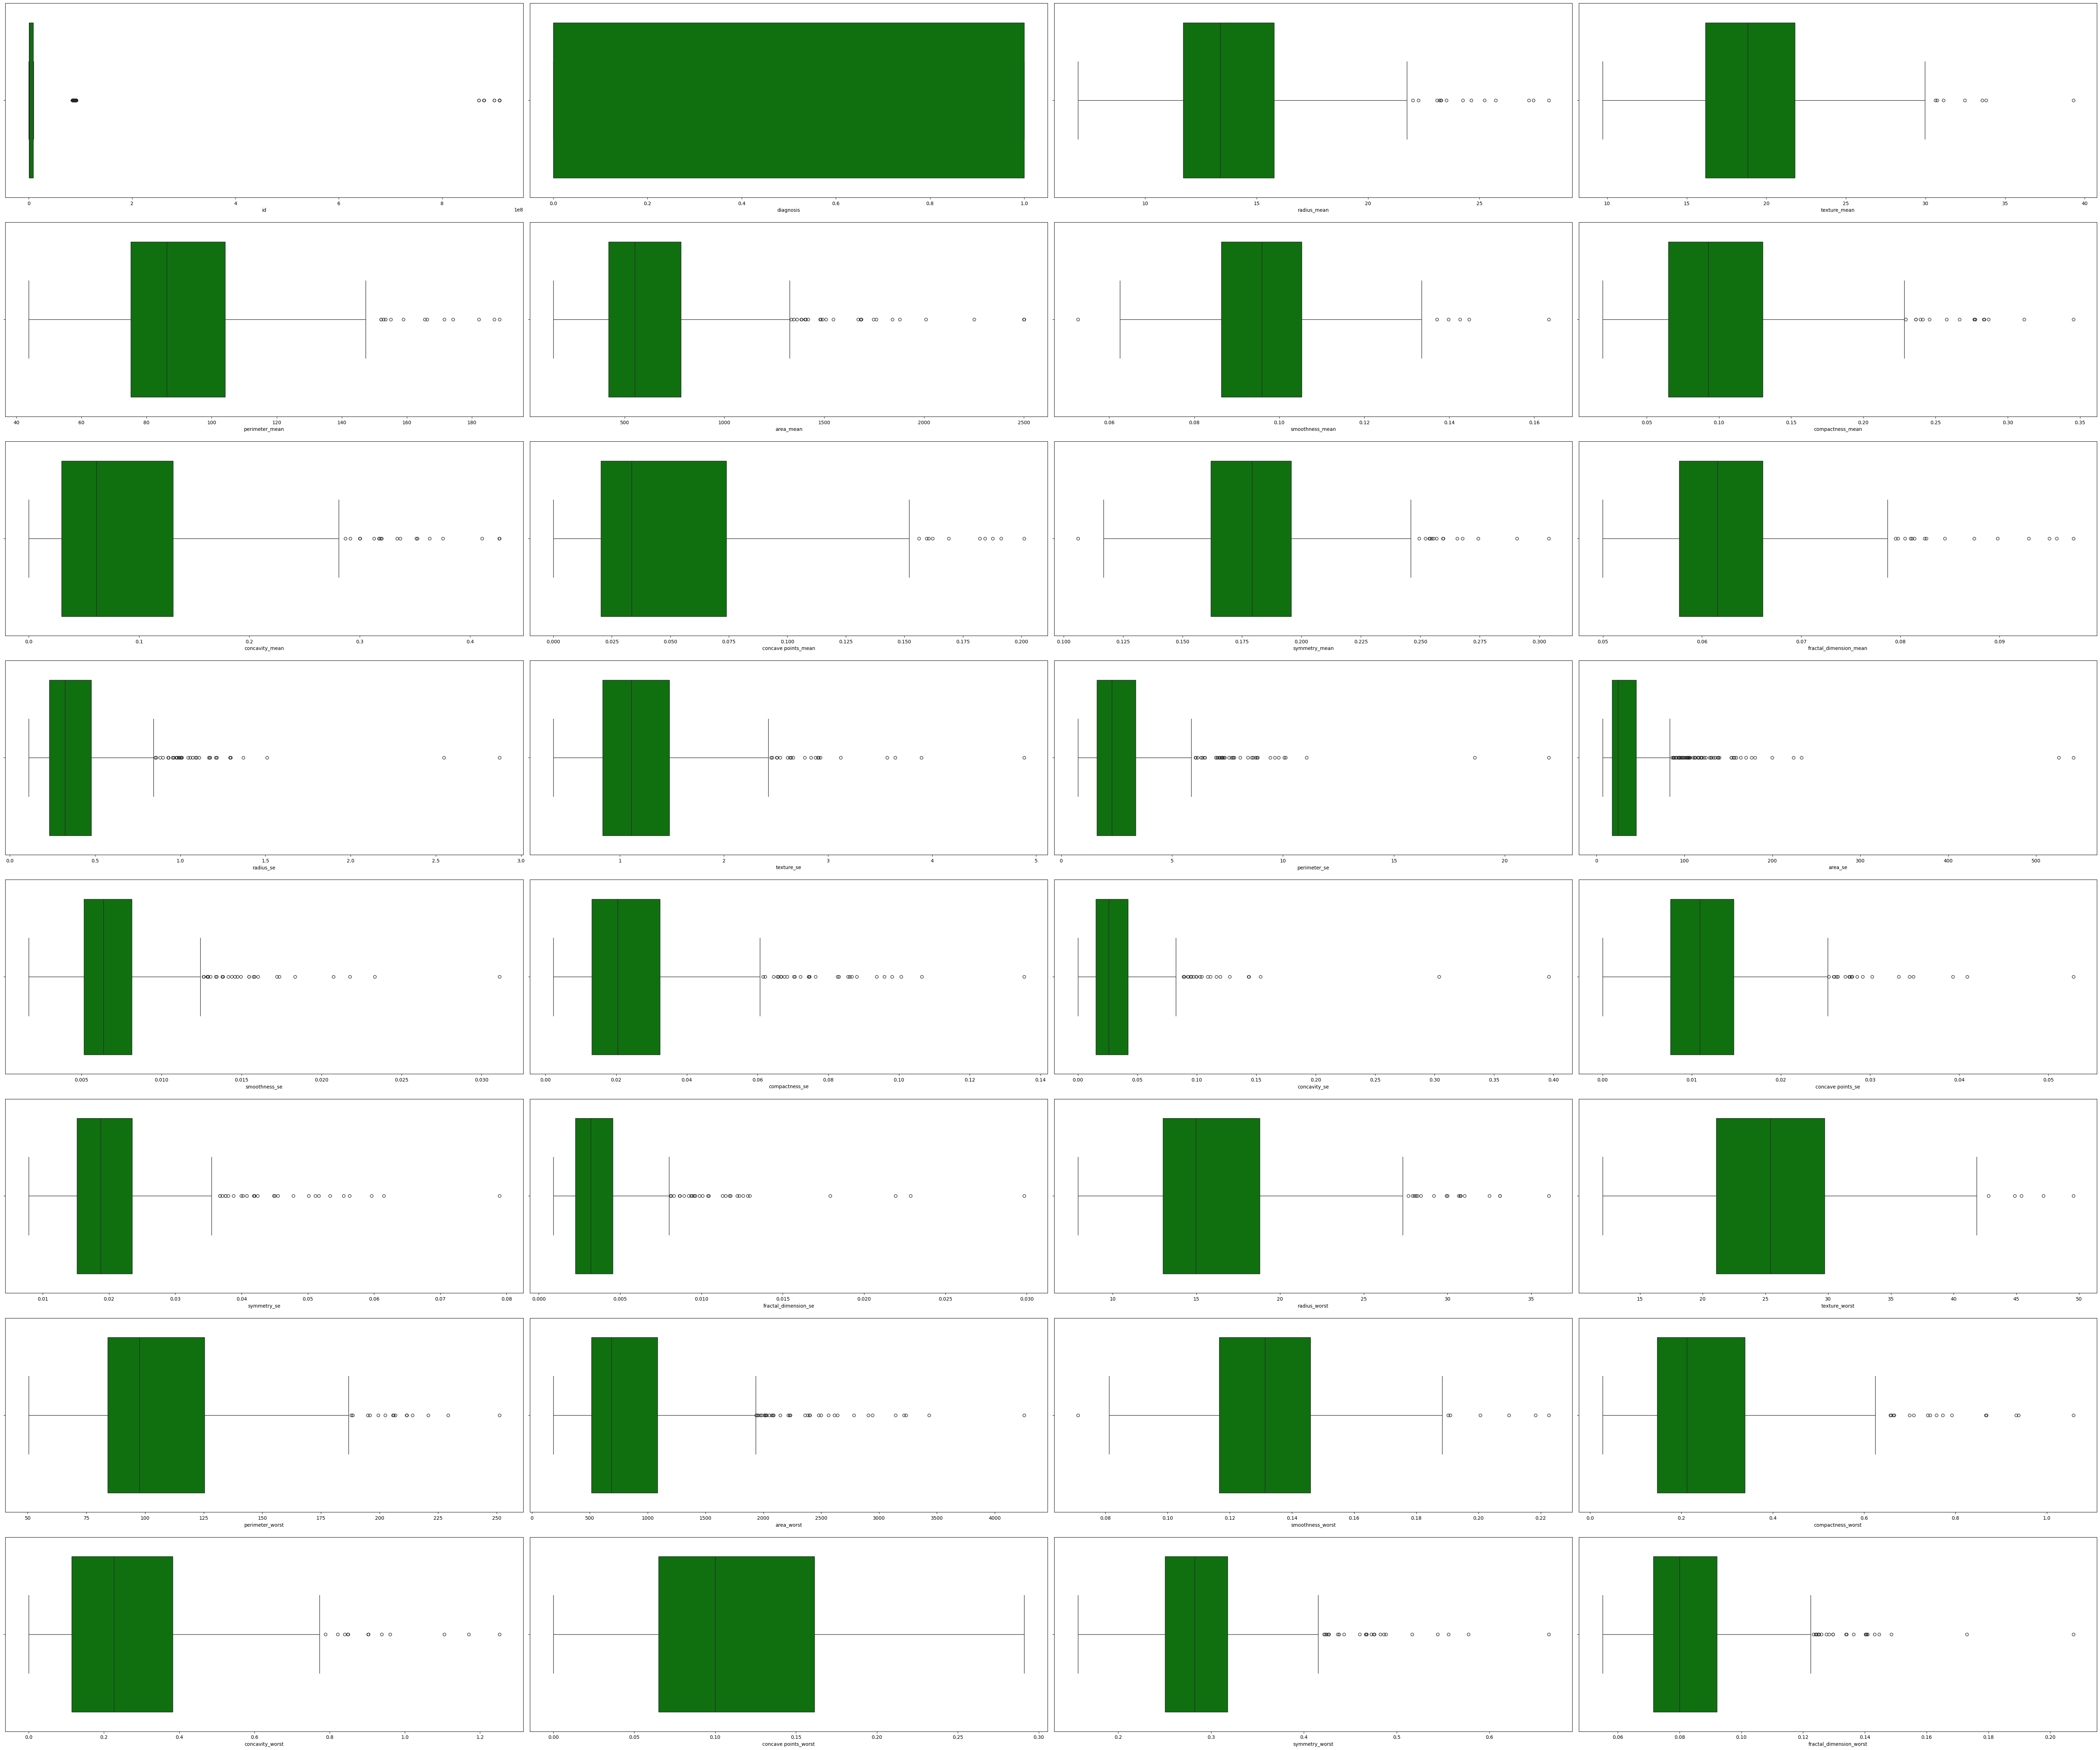

In [21]:
' Box plot '
fig = plt.figure(figsize=(60, 50))
temp = df.columns.tolist()
for i, item in enumerate(temp):
    plt.subplot(8, 4, i+1)
    sns.boxplot(data=df, x=item, color='green')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.show()

In [23]:
scaler = MinMaxScaler()
columns = df.columns
df = pd.DataFrame(scaler.fit_transform(df))
df.columns = columns
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.000915,1.0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.000915,1.0,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.092495,1.0,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.092547,1.0,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.092559,1.0,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


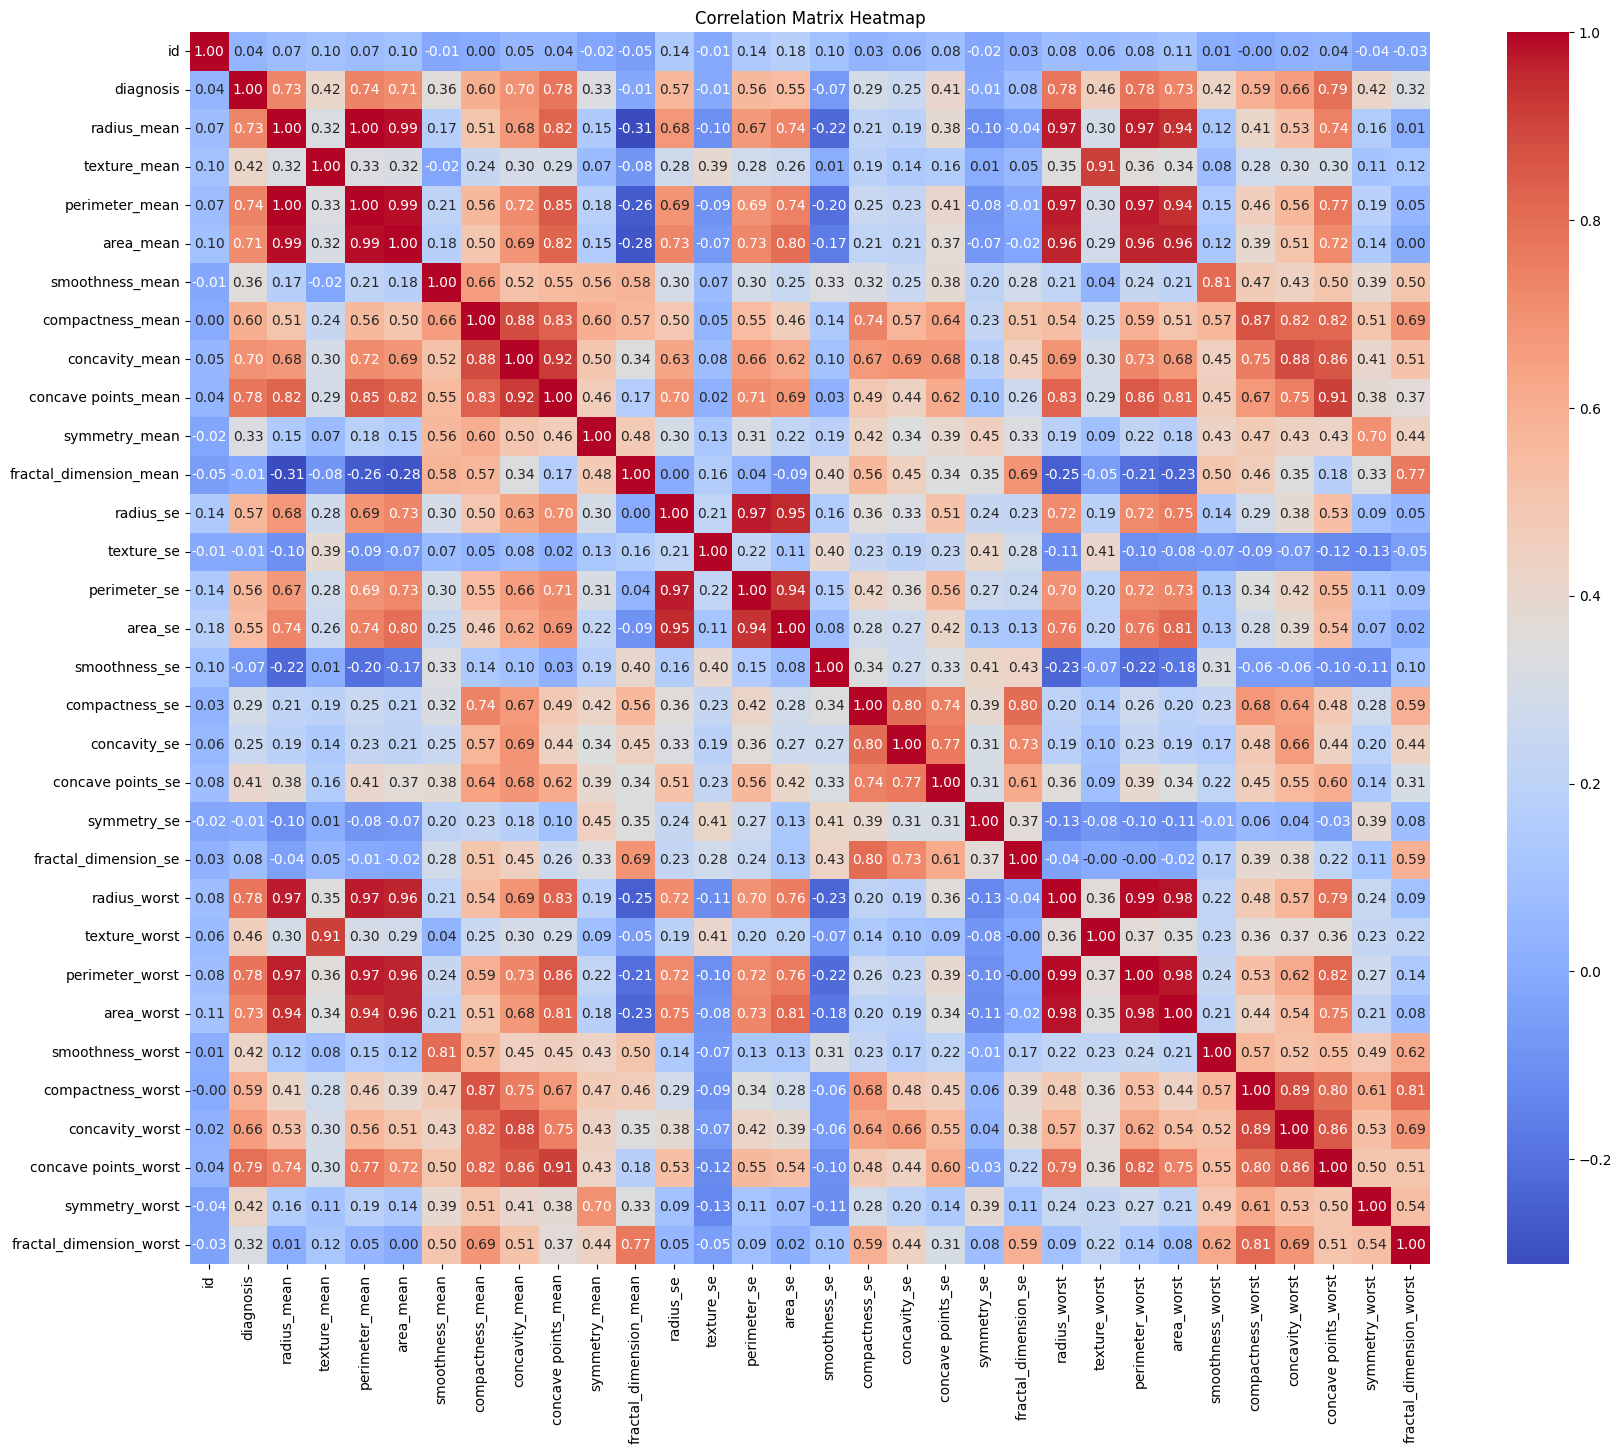

In [26]:
' Heat map'
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 16))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Add title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

In [27]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [29]:
'Model '

rf=RandomForestClassifier()
dt=DecisionTreeClassifier()
lr=LogisticRegression()

In [30]:
'RF '
print ('Random Forest model : ')
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)
print ('Train : ', accuracy_score(y_train,rf.predict(X_train)))
print ('Test : ', accuracy_score(y_test,y_pred_rf))

Random Forest model : 
Train :  1.0
Test :  0.9649122807017544


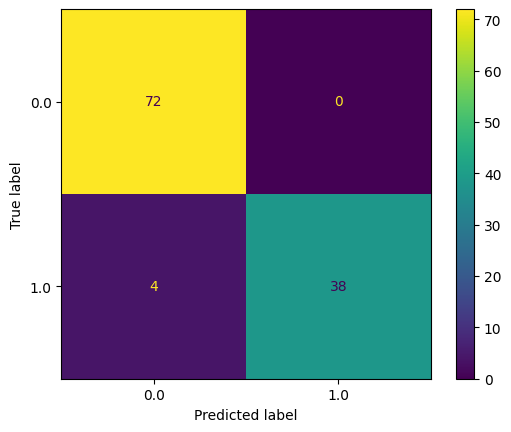

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix, classification_report

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)

plt.show()

In [32]:
'Logistic '
print ('Logistic regression model : ')
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)
print ('Train : ', accuracy_score(y_train,lr.predict(X_train)))
print ('Test : ', accuracy_score(y_test,y_pred_lr))

Logistic regression model : 
Train :  0.9692307692307692
Test :  0.9736842105263158


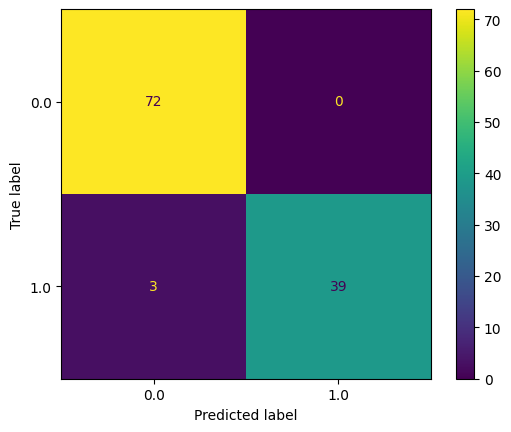

In [33]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr)

plt.show()

In [34]:
'DT '
print ('Decision Tree model : ')
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)
print ('Train : ', accuracy_score(y_train,dt.predict(X_train)))
print ('Test : ', accuracy_score(y_test,y_pred_dt))

Decision Tree model : 
Train :  1.0
Test :  0.9298245614035088


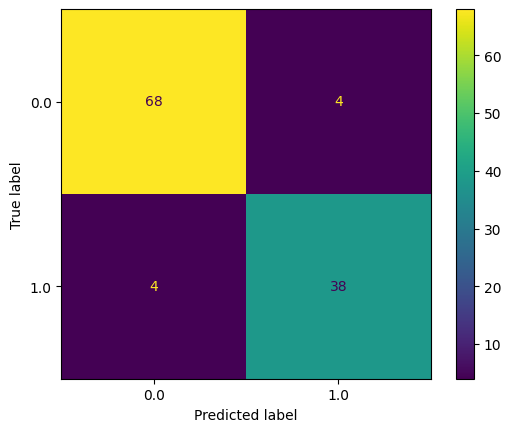

In [35]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt)

plt.show()

In [36]:

para={'n_estimators':[20,60,100,120],
      'max_features' : [0.2,0.6,1.0],
      'max_depth':[2,8,None],
      'max_samples':[0.5,0.75,1.0]
     }

# param_grid = { 
#     'n_estimators': [200, 500],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [4,5,6,7,8],
#     'criterion' :['gini', 'entropy']
# }

rf = RandomForestClassifier()
CV_rfc = GridSearchCV(estimator=rf, param_grid=para, cv= 5)
CV_rfc.fit(X_train, y_train)

# rf_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]})

In [37]:
print (CV_rfc.best_score_)
'be improved not much'

0.9670329670329672


Text(0.5, 1.0, 'Accurancy of each model')

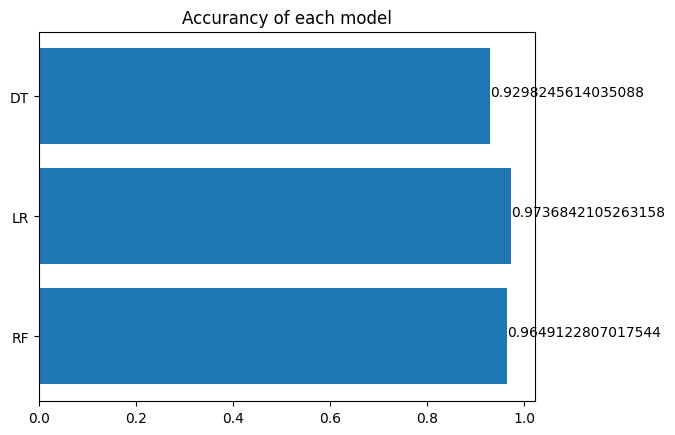

In [44]:
X = ['RF', 'LR', 'DT']
y = [accuracy_score(y_test,y_pred_rf), accuracy_score(y_test,y_pred_lr),accuracy_score(y_test,y_pred_dt)]

plt.barh (X, y)

for index, value in enumerate(y):
    plt.text(value, index,
             str(value))
plt.title('Accurancy of each model')